# A/B Test: Facebook Ads vs. Google Ads Conversion Performance

#### **Research Objective:**
To determine if the Facebook Ad campaign is more effective in terms of conversions compared to the Google Ad campaign, utilizing an A/B testing methodology.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import scipy.stats as st

## Obtaining data

In [2]:
# importing data
path = '../data/dataset.csv'
df = pd.read_csv(path)

In [3]:
# verifying dataset
df

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2023,FB_Jan,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan,4984,59,5,$234,1.18%,8.40%,$3.30
1,1/2/2023,FB_Jan,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2023,FB_Jan,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2023,FB_Jan,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2023,FB_Jan,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan,4070,55,7,$133,1.36%,12.22%,$2.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2023,FB_Dec,3240,51,13,$63,1.57%,25.89%,$1.24,AW_Dec,5332,72,9,$76,1.35%,11.92%,$1.06
361,12/28/2023,FB_Dec,1510,69,18,$97,4.55%,25.82%,$1.42,AW_Dec,3887,49,6,$121,1.27%,13.10%,$2.46
362,12/29/2023,FB_Dec,2918,44,13,$49,1.50%,29.11%,$1.11,AW_Dec,5327,62,6,$128,1.16%,9.85%,$2.08
363,12/30/2023,FB_Dec,2212,37,8,$102,1.68%,22.70%,$2.75,AW_Dec,4020,71,6,$119,1.76%,7.83%,$1.68


## Raw Data Cleaning and Preparation

In [4]:
# dataframe structure and information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Date                                             365 non-null    object
 1   Facebook Ad Campaign                             365 non-null    object
 2   Facebook Ad Views                                365 non-null    int64 
 3   Facebook Ad Clicks                               365 non-null    int64 
 4   Facebook Ad Conversions                          365 non-null    int64 
 5   Cost per Facebook Ad                             365 non-null    object
 6   Facebook Click-Through Rate (Clicks / View)      365 non-null    object
 7   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    object
 8   Facebook Cost per Click (Ad Cost / Clicks)       365 non-null    object
 9   AdWords Ad Campaign                        

In [5]:
# checking for null or missing values
df.isnull().sum()

Date                                               0
Facebook Ad Campaign                               0
Facebook Ad Views                                  0
Facebook Ad Clicks                                 0
Facebook Ad Conversions                            0
Cost per Facebook Ad                               0
Facebook Click-Through Rate (Clicks / View)        0
Facebook Conversion Rate (Conversions / Clicks)    0
Facebook Cost per Click (Ad Cost / Clicks)         0
AdWords Ad Campaign                                0
AdWords Ad Views                                   0
AdWords Ad Clicks                                  0
AdWords Ad Conversions                             0
Cost per AdWords Ad                                0
AdWords Click-Through Rate (Clicks / View)         0
AdWords Conversion Rate (Conversions / Click)      0
AdWords Cost per Click (Ad Cost / Clicks)          0
dtype: int64

In [6]:
df.isna().sum()

Date                                               0
Facebook Ad Campaign                               0
Facebook Ad Views                                  0
Facebook Ad Clicks                                 0
Facebook Ad Conversions                            0
Cost per Facebook Ad                               0
Facebook Click-Through Rate (Clicks / View)        0
Facebook Conversion Rate (Conversions / Clicks)    0
Facebook Cost per Click (Ad Cost / Clicks)         0
AdWords Ad Campaign                                0
AdWords Ad Views                                   0
AdWords Ad Clicks                                  0
AdWords Ad Conversions                             0
Cost per AdWords Ad                                0
AdWords Click-Through Rate (Clicks / View)         0
AdWords Conversion Rate (Conversions / Click)      0
AdWords Cost per Click (Ad Cost / Clicks)          0
dtype: int64

In [7]:
# checking for duplicate values
df[df.duplicated()].count()

Date                                               0
Facebook Ad Campaign                               0
Facebook Ad Views                                  0
Facebook Ad Clicks                                 0
Facebook Ad Conversions                            0
Cost per Facebook Ad                               0
Facebook Click-Through Rate (Clicks / View)        0
Facebook Conversion Rate (Conversions / Clicks)    0
Facebook Cost per Click (Ad Cost / Clicks)         0
AdWords Ad Campaign                                0
AdWords Ad Views                                   0
AdWords Ad Clicks                                  0
AdWords Ad Conversions                             0
Cost per AdWords Ad                                0
AdWords Click-Through Rate (Clicks / View)         0
AdWords Conversion Rate (Conversions / Click)      0
AdWords Cost per Click (Ad Cost / Clicks)          0
dtype: int64

### Labeling

In [8]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2023,FB_Jan,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan,4984,59,5,$234,1.18%,8.40%,$3.30
1,1/2/2023,FB_Jan,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2023,FB_Jan,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2023,FB_Jan,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2023,FB_Jan,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan,4070,55,7,$133,1.36%,12.22%,$2.40


In [9]:
df.columns

Index(['Date', 'Facebook Ad Campaign', 'Facebook Ad Views',
       'Facebook Ad Clicks', 'Facebook Ad Conversions', 'Cost per Facebook Ad',
       'Facebook Click-Through Rate (Clicks / View)',
       'Facebook Conversion Rate (Conversions / Clicks)',
       'Facebook Cost per Click (Ad Cost / Clicks)', 'AdWords Ad Campaign',
       'AdWords Ad Views', 'AdWords Ad Clicks', 'AdWords Ad Conversions',
       'Cost per AdWords Ad', 'AdWords Click-Through Rate (Clicks / View)',
       'AdWords Conversion Rate (Conversions / Click)',
       'AdWords Cost per Click (Ad Cost / Clicks)'],
      dtype='object')

In [10]:
# renaming columns
df.rename({
    'Facebook Ad Campaign':'fb_month'
    ,'Facebook Ad Views':'fb_views'
    ,'Facebook Ad Clicks':'fb_clicks'
    ,'Facebook Ad Conversions':'fb_cv'
    ,'Cost per Facebook Ad':'fb_cost_per_ad'
    ,'Facebook Click-Through Rate (Clicks / View)':'fb_ctr'
    ,'Facebook Conversion Rate (Conversions / Clicks)':'fb_cvr'
    ,'Facebook Cost per Click (Ad Cost / Clicks)':'fb_cpc'
    , 'AdWords Ad Campaign':'g_month'
    ,'AdWords Ad Views':'g_views'
    ,'AdWords Ad Clicks':'g_clicks'
    ,'AdWords Ad Conversions':'g_cv'
    ,'Cost per AdWords Ad':'g_cost_per_ad'
    ,'AdWords Click-Through Rate (Clicks / View)':'g_ctr'
    ,'AdWords Conversion Rate (Conversions / Click)':'g_cvr'
    ,'AdWords Cost per Click (Ad Cost / Clicks)':'g_cpc'
}, axis=1, inplace=True)

In [11]:
df.head()

,Date,fb_month,fb_views,fb_clicks,fb_cv,fb_cost_per_ad,fb_ctr,fb_cvr,fb_cpc,g_month,g_views,g_clicks,g_cv,g_cost_per_ad,g_ctr,g_cvr,g_cpc
0,1/1/2023,FB_Jan,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan,4984,59,5,$234,1.18%,8.40%,$3.30
1,1/2/2023,FB_Jan,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2023,FB_Jan,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2023,FB_Jan,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2023,FB_Jan,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan,4070,55,7,$133,1.36%,12.22%,$2.40


### Dates and Times

In [12]:
df.head()

,Date,fb_month,fb_views,fb_clicks,fb_cv,fb_cost_per_ad,fb_ctr,fb_cvr,fb_cpc,g_month,g_views,g_clicks,g_cv,g_cost_per_ad,g_ctr,g_cvr,g_cpc
0,1/1/2023,FB_Jan,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan,4984,59,5,$234,1.18%,8.40%,$3.30
1,1/2/2023,FB_Jan,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2023,FB_Jan,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2023,FB_Jan,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2023,FB_Jan,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan,4070,55,7,$133,1.36%,12.22%,$2.40


In [13]:
df.dtypes

Date              object
fb_month          object
fb_views           int64
fb_clicks          int64
fb_cv              int64
fb_cost_per_ad    object
fb_ctr            object
fb_cvr            object
fb_cpc            object
g_month           object
g_views            int64
g_clicks           int64
g_cv               int64
g_cost_per_ad     object
g_ctr             object
g_cvr             object
g_cpc             object
dtype: object

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df.dtypes

Date              datetime64[ns]
fb_month                  object
fb_views                   int64
fb_clicks                  int64
fb_cv                      int64
fb_cost_per_ad            object
fb_ctr                    object
fb_cvr                    object
fb_cpc                    object
g_month                   object
g_views                    int64
g_clicks                   int64
g_cv                       int64
g_cost_per_ad             object
g_ctr                     object
g_cvr                     object
g_cpc                     object
dtype: object

### Data Types

In [16]:
df.head()

,Date,fb_month,fb_views,fb_clicks,fb_cv,fb_cost_per_ad,fb_ctr,fb_cvr,fb_cpc,g_month,g_views,g_clicks,g_cv,g_cost_per_ad,g_ctr,g_cvr,g_cpc
0,2023-01-01,FB_Jan,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan,4984,59,5,$234,1.18%,8.40%,$3.30
1,2023-01-02,FB_Jan,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan,4022,71,6,$75,1.77%,7.80%,$1.05
2,2023-01-03,FB_Jan,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan,3863,44,4,$141,1.13%,9.59%,$3.23
3,2023-01-04,FB_Jan,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan,3911,49,5,$141,1.26%,11.08%,$2.86
4,2023-01-05,FB_Jan,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan,4070,55,7,$133,1.36%,12.22%,$2.40


In [17]:
df['fb_cost_per_ad'].apply(type).value_counts()

fb_cost_per_ad
<class 'str'>    365
Name: count, dtype: int64

In [18]:
df['fb_cost_per_ad'] = df['fb_cost_per_ad'].replace({'\$': ''}, regex=True).astype(float)

In [19]:
df['fb_cost_per_ad'].apply(type).value_counts()

fb_cost_per_ad
<class 'float'>    365
Name: count, dtype: int64

In [20]:
df['fb_ctr'].apply(type).value_counts()

fb_ctr
<class 'str'>    365
Name: count, dtype: int64

In [21]:
df['fb_ctr'] = df['fb_ctr'].replace({'\%': ''}, regex=True).astype(float)

In [22]:
df['fb_ctr'].apply(type).value_counts()

fb_ctr
<class 'float'>    365
Name: count, dtype: int64

In [23]:
df['fb_cvr'] = df['fb_cvr'].replace({'\%': ''}, regex=True).astype(float)
df['fb_cpc'] = df['fb_cpc'].replace({'\$': ''}, regex=True).astype(float)
df['g_cost_per_ad'] = df['g_cost_per_ad'].replace({'\$': ''}, regex=True).astype(float)
df['g_ctr'] = df['g_ctr'].replace({'\%': ''}, regex=True).astype(float)
df['g_cvr'] = df['g_cvr'].replace({'\%': ''}, regex=True).astype(float)
df['g_cpc'] = df['g_cpc'].replace({'\$': ''}, regex=True).astype(float)

In [24]:
df.head()

,Date,fb_month,fb_views,fb_clicks,fb_cv,fb_cost_per_ad,fb_ctr,fb_cvr,fb_cpc,g_month,g_views,g_clicks,g_cv,g_cost_per_ad,g_ctr,g_cvr,g_cpc
0,2023-01-01,FB_Jan,2116,18,8,126.0,0.83,42.73,7.14,AW_Jan,4984,59,5,234.0,1.18,8.40,3.30
1,2023-01-02,FB_Jan,3106,36,12,104.0,1.15,34.04,2.91,AW_Jan,4022,71,6,75.0,1.77,7.80,1.05
2,2023-01-03,FB_Jan,3105,26,8,102.0,0.84,31.45,3.89,AW_Jan,3863,44,4,141.0,1.13,9.59,3.23
3,2023-01-04,FB_Jan,1107,27,9,71.0,2.45,34.76,2.62,AW_Jan,3911,49,5,141.0,1.26,11.08,2.86
4,2023-01-05,FB_Jan,1317,15,7,78.0,1.10,47.59,5.38,AW_Jan,4070,55,7,133.0,1.36,12.22,2.40


In [25]:
df['fb_ctr'] = df['fb_ctr'] / 100
df['fb_cvr'] = df['fb_cvr'] / 100
df['g_ctr'] = df['g_ctr'] / 100
df['g_cvr'] = df['g_cvr'] / 100

In [26]:
df.head()

,Date,fb_month,fb_views,fb_clicks,fb_cv,fb_cost_per_ad,fb_ctr,fb_cvr,fb_cpc,g_month,g_views,g_clicks,g_cv,g_cost_per_ad,g_ctr,g_cvr,g_cpc
0,2023-01-01,FB_Jan,2116,18,8,126.0,0.0083,0.4273,7.14,AW_Jan,4984,59,5,234.0,0.0118,0.0840,3.30
1,2023-01-02,FB_Jan,3106,36,12,104.0,0.0115,0.3404,2.91,AW_Jan,4022,71,6,75.0,0.0177,0.0780,1.05
2,2023-01-03,FB_Jan,3105,26,8,102.0,0.0084,0.3145,3.89,AW_Jan,3863,44,4,141.0,0.0113,0.0959,3.23
3,2023-01-04,FB_Jan,1107,27,9,71.0,0.0245,0.3476,2.62,AW_Jan,3911,49,5,141.0,0.0126,0.1108,2.86
4,2023-01-05,FB_Jan,1317,15,7,78.0,0.0110,0.4759,5.38,AW_Jan,4070,55,7,133.0,0.0136,0.1222,2.40


In [27]:
df.dtypes

Date              datetime64[ns]
fb_month                  object
fb_views                   int64
fb_clicks                  int64
fb_cv                      int64
fb_cost_per_ad           float64
fb_ctr                   float64
fb_cvr                   float64
fb_cpc                   float64
g_month                   object
g_views                    int64
g_clicks                   int64
g_cv                       int64
g_cost_per_ad            float64
g_ctr                    float64
g_cvr                    float64
g_cpc                    float64
dtype: object

***

## Exploratory Data Analysis (EDA)

### Summary Statistics

In [28]:
# General Description
df.describe()

,Date,fb_views,fb_clicks,fb_cv,fb_cost_per_ad,fb_ctr,fb_cvr,fb_cpc,g_views,g_clicks,g_cv,g_cost_per_ad,g_ctr,g_cvr,g_cpc
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2023-07-02 00:00:00,2179.687671,44.049315,11.742466,87.780822,0.022013,0.271533,2.187808,4717.19726,60.383562,5.980822,135.084932,0.012958,0.101844,2.377863
min,2023-01-01 00:00:00,1050.000000,15.000000,5.000000,34.000000,0.008300,0.214800,0.610000,3714.00000,31.000000,3.000000,73.000000,0.005700,0.061300,0.850000
25%,2023-04-02 00:00:00,1656.000000,35.000000,10.000000,63.000000,0.014900,0.238000,1.410000,4247.00000,49.000000,5.000000,110.000000,0.010300,0.077000,1.760000
50%,2023-07-02 00:00:00,2202.000000,43.000000,12.000000,88.000000,0.020000,0.267700,2.020000,4711.00000,60.000000,6.000000,135.000000,0.012900,0.099300,2.290000
75%,2023-10-01 00:00:00,2717.000000,54.000000,13.000000,111.000000,0.026700,0.289700,2.760000,5190.00000,73.000000,7.000000,162.000000,0.015200,0.120300,2.810000
max,2023-12-31 00:00:00,3320.000000,73.000000,19.000000,144.000000,0.053700,0.475900,7.140000,5760.00000,89.000000,9.000000,234.000000,0.022500,0.200600,5.650000
std,NaN,618.074639,12.140559,2.924786,28.263014,0.009332,0.041659,1.040820,561.11406,14.368225,1.628106,32.605550,0.003388,0.028874,0.856929


### 1. Univariate Analysis

#### **1.1 Facebook Ad Conversion Rates**

In [29]:
# Facebook ad conversiton rate

mean_fb_cvr = df['fb_cvr'].mean()
median_fb_cvr = df['fb_cvr'].median()
std_fb_cvr = df['fb_cvr'].std()

print('Mean of Facebook Conversion Rate:', mean_fb_cvr)
print('Median of Facebook Conversion Rate:', median_fb_cvr)
print('Standard Deviation of Facebook Conversion Rate:', std_fb_cvr)

Mean of Facebook Conversion Rate: 0.2715328767123288
Median of Facebook Conversion Rate: 0.2677
Standard Deviation of Facebook Conversion Rate: 0.04165920559321595


#### **Frequency Distribution**

In [30]:
binwidth = 0.02
start = min(df['fb_cvr'])
end = max(df['fb_cvr']) + binwidth
step = binwidth

bins = []
bin = start
while bin < end:
    bins.append(bin)
    bin += step
# print(bins)

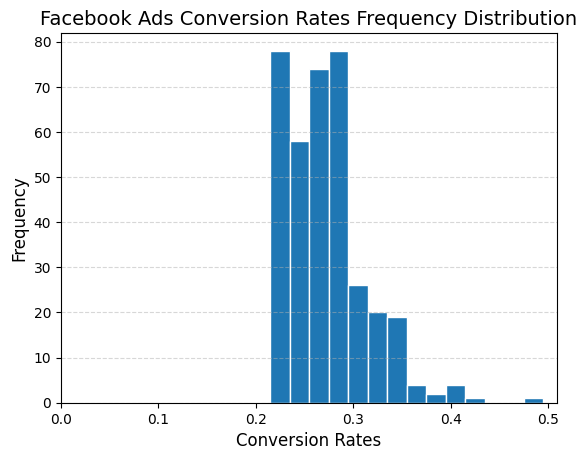

In [31]:
# plotting a histogram of facebook ad conversion rates

plt.hist(df['fb_cvr']
         , bins = bins
         , edgecolor="white"
        )

plt.title("Facebook Ads Conversion Rates Frequency Distribution", fontsize=14)
plt.xlabel("Conversion Rates", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

<div style="background-color: #e6ffe6; border-left: 5px solid #4CAF50; padding: 10px; margin: 10px 0; border-radius: 4px;">
    <strong>Quick Comment:</strong> The graph indicates a right-skewed normal distribution (or "positively skewed" distribution). Most of the values end up left of the mean, and the most extreme values are on the right side. Also, most of Facebook Ad conversion rates cluster around 20-30%.
</div>

#### **Conversion Rates Over Time**

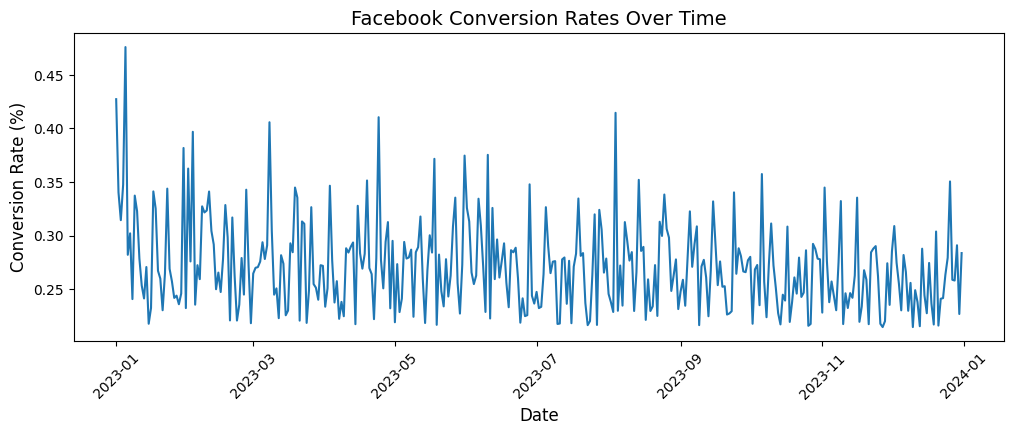

In [32]:
# plotting a line graph of facebook ad conversion rates

fig,ax = plt.subplots(figsize=[12, 4])
plt.plot(df['Date'], df['fb_cvr'])

plt.title("Facebook Conversion Rates Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Conversion Rate (%)", fontsize=12)
# plt.legend(loc='center right')
plt.xticks(rotation=45)

plt.show()

***

#### **1.2 Google Ad Conversion Rates**

In [33]:
# Google ad conversiton rate

mean_g_cvr = df['g_cvr'].mean()
median_g_cvr = df['g_cvr'].median()
std_g_cvr = df['g_cvr'].std()

print('Mean of Google Conversion Rate:', mean_g_cvr)
print('Median of Google Conversion Rate:', median_g_cvr)
print('Standard Deviation of Google Conversion Rate:', std_g_cvr)

Mean of Google Conversion Rate: 0.10184356164383561
Median of Google Conversion Rate: 0.0993
Standard Deviation of Google Conversion Rate: 0.028874447683688863


#### **Frequency Distribution**

In [34]:
binwidth = 0.01
start = min(df['g_cvr'])
end = max(df['g_cvr']) + binwidth
step = binwidth

bins = []
bin = start
while bin < end:
    bins.append(bin)
    bin += step
# print(bins)

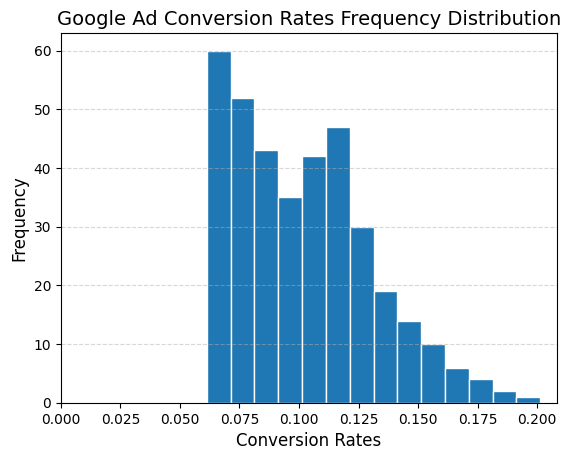

In [35]:
# plotting a histogram of google ad conversion rates

plt.hist(df['g_cvr']
         , bins = bins
         , edgecolor="white"
        )

plt.title("Google Ad Conversion Rates Frequency Distribution", fontsize=14)
plt.xlabel("Conversion Rates", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

<div style="background-color: #e6ffe6; border-left: 5px solid #4CAF50; padding: 10px; margin: 10px 0; border-radius: 4px;">
    <strong>Quick Comment:</strong> The graph indicates a right-skewed normal distribution (or "positively skewed" distribution). Most of the values end up left of the mean, and the most extreme values are on the right side. Also, most of Google Ad conversion rates cluster around 6-12%.
</div>

#### **Conversion Rates Over Time**

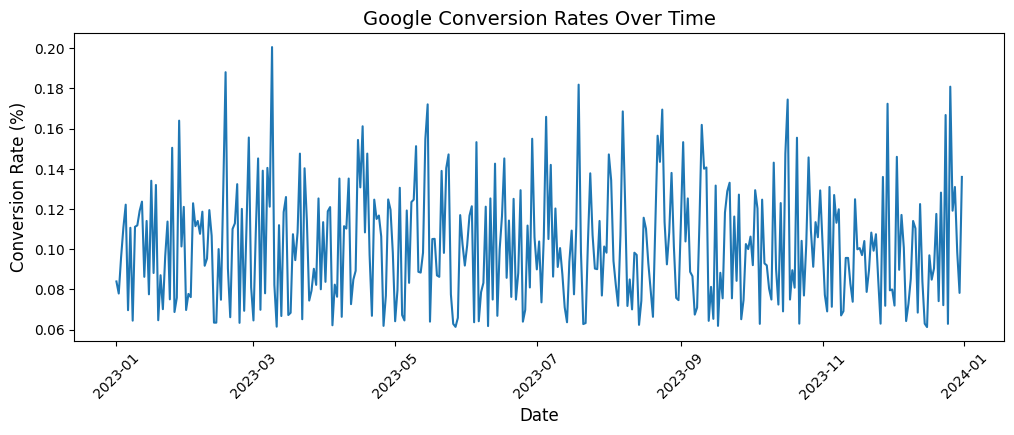

In [36]:
# plotting a line graph of Google ad conversion rates

fig,ax = plt.subplots(figsize=[12, 4])
plt.plot(df['Date'], df['g_cvr'])

plt.title("Google Conversion Rates Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Conversion Rate (%)", fontsize=12)
# plt.legend(loc='center right')
plt.xticks(rotation=45)

plt.show()

***

### 2. Bivariate Analysis

#### **2.1 Correlation between Facebook Ad clicks and the number of conversions**
##### Do more clicks on the Facebook ad really lead to more sales?

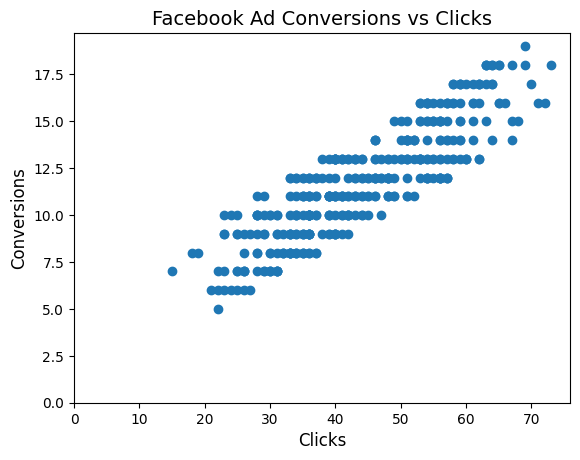

In [37]:
# scatter plot
plt.scatter(df['fb_clicks'], df['fb_cv'])

plt.title("Facebook Ad Conversions vs Clicks", fontsize=14)
plt.xlabel("Clicks", fontsize=12)
plt.ylabel("Conversions", fontsize=12)
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

In [38]:
df[['fb_clicks', 'fb_cv']].corr()

,fb_clicks,fb_cv
fb_clicks,1.000000,0.873775
fb_cv,0.873775,1.000000


In [39]:
print('Correlation coefficient:', df['fb_clicks'].corr(df['fb_cv']))

Correlation coefficient: 0.8737750148613904


***

#### **2.2 Correlation between Google Ad clicks and the number of conversions**
##### Do more clicks on the Google ad really lead to more sales?

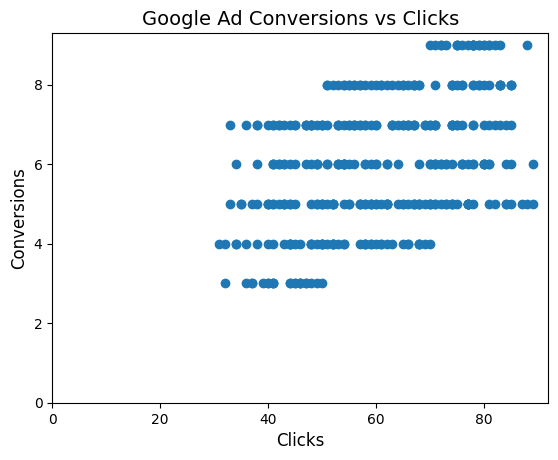

In [40]:
# scatter plot
plt.scatter(df['g_clicks'], df['g_cv'])

plt.title("Google Ad Conversions vs Clicks", fontsize=14)
plt.xlabel("Clicks", fontsize=12)
plt.ylabel("Conversions", fontsize=12)
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

In [41]:
df[['g_clicks', 'g_cv']].corr()

,g_clicks,g_cv
g_clicks,1.000000,0.447993
g_cv,0.447993,1.000000


In [42]:
print('Correlation coefficient:', df['g_clicks'].corr(df['g_cv']))

Correlation coefficient: 0.4479932009469764


***

#### **2.3 Conversions per clicks for each Ad**

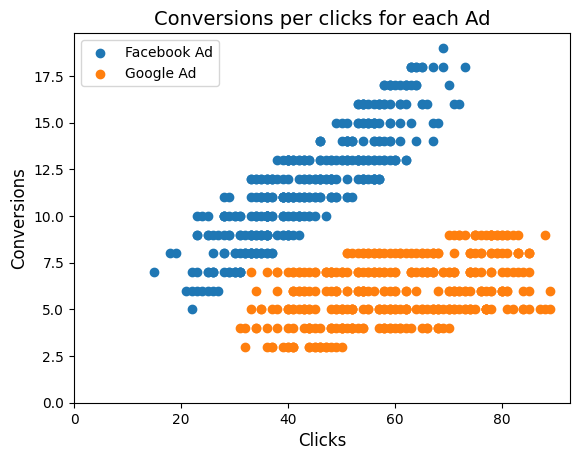

In [43]:
plt.scatter(df['fb_clicks'], df['fb_cv'], label='Facebook Ad')
plt.scatter(df['g_clicks'], df['g_cv'], label='Google Ad')

plt.title("Conversions per clicks for each Ad", fontsize=14)
plt.xlabel("Clicks", fontsize=12)
plt.ylabel("Conversions", fontsize=12)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend()

plt.show()

<div style="background-color: #e6ffe6; border-left: 5px solid #4CAF50; padding: 10px; margin: 10px 0; border-radius: 4px;">
    <strong>Quick Comment:</strong> It is clear from this graph that <strong><em>clicks</em></strong> driven by the Google advertising platform are more than those driven by the Facebook advertising platform. However, <strong><em>conversions</em></strong> driven by the Facebook advertising platform are more than those driven by the Google advertising platform.
</div>

***

## A/B Test

### Comparing Facebook and Google Platforms

#### **Problem**
Examine whether there is a difference between the conversion rate on the Facebook platform versus the Google platform.

#### **Primary Metric**
Conversion rate

#### **Hypothesis**

<p style="font-size:1.5em">
    $
    H_0: \mu_{_{FB}} - \mu_{_{G}} = 0
    $
</p>

<p style="font-size:1.5em">
    $
    H_1: \mu_{_{FB}} - \mu_{_{G}} \neq 0
    $


In [44]:
df.head()

,Date,fb_month,fb_views,fb_clicks,fb_cv,fb_cost_per_ad,fb_ctr,fb_cvr,fb_cpc,g_month,g_views,g_clicks,g_cv,g_cost_per_ad,g_ctr,g_cvr,g_cpc
0,2023-01-01,FB_Jan,2116,18,8,126.0,0.0083,0.4273,7.14,AW_Jan,4984,59,5,234.0,0.0118,0.0840,3.30
1,2023-01-02,FB_Jan,3106,36,12,104.0,0.0115,0.3404,2.91,AW_Jan,4022,71,6,75.0,0.0177,0.0780,1.05
2,2023-01-03,FB_Jan,3105,26,8,102.0,0.0084,0.3145,3.89,AW_Jan,3863,44,4,141.0,0.0113,0.0959,3.23
3,2023-01-04,FB_Jan,1107,27,9,71.0,0.0245,0.3476,2.62,AW_Jan,3911,49,5,141.0,0.0126,0.1108,2.86
4,2023-01-05,FB_Jan,1317,15,7,78.0,0.0110,0.4759,5.38,AW_Jan,4070,55,7,133.0,0.0136,0.1222,2.40


In [47]:
# means difference
mean_diff = mean_fb_cvr - mean_g_cvr
print(mean_diff)

0.16968931506849316


In [46]:
df.shape

(365, 17)

In [48]:
# samples sizes
n_fb = df['fb_cvr'].count()
n_g = df['g_cvr'].count()
print(n_fb, n_g)

365 365


In [49]:
# degrees of freedom
dof = n_fb + n_g - 2
print(dof)

728


In [50]:
# variance
var_fb = df['fb_cvr'].var()
var_g = df['g_cvr'].var()
print(var_fb, var_g)

0.0017354894106578352 0.0008337337290380852


In [51]:
# pooled variance
varp = (((n_fb - 1) * var_fb) + ((n_g - 1) * var_g)) / dof
print(varp)

0.0012846115698479602


In [52]:
# pooled standard error
se_p = ((varp / n_fb) + (varp / n_g)) ** (1/2)
print(se_p)

0.0026531052572440882


In [53]:
# t-score
tscr = (mean_diff - 0) / se_p
print(tscr)

63.95875723557152


In [53]:
df[['fb_cvr', 'g_cvr']].describe()

,fb_cvr,g_cvr
count,365.000000,365.000000
mean,0.271533,0.101844
std,0.041659,0.028874
min,0.214800,0.061300
25%,0.238000,0.077000
50%,0.267700,0.099300
75%,0.289700,0.120300
max,0.475900,0.200600


In [54]:
# p-value
pval = st.t.cdf(-1 * abs(tscr), df=dof) * 2
print(pval)

5.429820948529956e-301


The T-score value is <strong>extremely significant</strong>. This is a very extreme test statistic.
<br/>For common tests, a rule of thumb is to reject the null hypotheses when the T-score is bigger than 2.
<br/>From the mean values of 0.27 and 0.10 and with such small standard deviations of 0.04 and 0.03 respectively, we could easily say that the conversion rates are different.
<br/>The positive value of t-statistic indicates that Facebook Ad conversion rate population mean is greater than the Google Ad one.

Such an extreme result also means that the hypotheses is pointless (the hypothesis doesn't make much sense).
<br/>A much more interesting question would be if the conversion rate of Facebook Ad is 15% higher than that of Google Ad.

***

#### **Problem**
Examine whether the conversion rate on the Facebook platform is 16% higher than the conversion rate on the Google platform.

#### **Primary Metric**
Conversio rate

#### **Hypothesis**

<p style="font-size:1.5em">
    $
    H_0: \mu_{_{FB}} - \mu_{_{G}} \leq 0.16
    $
</p>

<p style="font-size:1.5em">
    $
    H_1: \mu_{_{FB}} - \mu_{_{G}} > 0.16
    $


In [56]:
pop_mean = 0.16

In [57]:
# t-score
tscr = (mean_diff - pop_mean) / se_p
print(tscr)

3.652065835698479


In [58]:
# p-value
# pval = st.t.cdf(-1 * abs(tscr), df=dof)
pval = 1 - st.t.cdf(tscr, df=dof)
print(pval)

0.00013939185693045975


The positive value of t-statistic indicates that Facebook Ad conversion rate population mean is greater than the Google Ad one.
<br/>At 0.05 significance, we reject the null hypothesis and accept the alternative hypothesis.

<strong>There is a strong statistical evidence that the Facebook Ad performs 16% better than the Google Ad.</strong>

***

#### **Problem**
Examine whether the number of conversion rate on the Facebook platform is 17% higher than the conversion rate on the Google platform.

#### **Primary Metric**
Conversion rate

#### **Hypothesis**

<p style="font-size:1.5em">
    $
    H_0: \mu_{_{FB}} - \mu_{_{G}} \leq 0.17
    $
</p>

<p style="font-size:1.5em">
    $
    H_1: \mu_{_{FB}} - \mu_{_{G}} > 0.17
    $


In [59]:
pop_mean = 0.17

In [60]:
# t-score
tscr = (mean_diff - pop_mean) / se_p
print(tscr)

-0.11710237679358912


In [61]:
# p-value
# pval = st.t.cdf(-1 * abs(tscr), df=dof)
pval = 1 - st.t.cdf(tscr, df=dof)
print(pval)

0.5465943878325259


At 0.05 significance, we fail to reject the null hypothesis.

<strong>There is "No significant" statistical evidence to consider the Facebook Ad performance is 17% better than the Google Ad.</strong>

***

### Result
#### <strong><em>Our conversion rate will be 16% greater if we advertise on Facebook platform rather than Google platform.</em></strong>

***